In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report

RANDOM_STATE = 42

In [2]:
# 1) Load dataset (binary classification)
data = load_breast_cancer()
X = data.data
y = data.target   # 0 = malignant, 1 = benign

# 2) Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# 3) Feature scaling (IMPORTANT for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
X_train_scaled

array([[-1.07200079, -0.6584246 , -1.0880801 , ..., -1.35052668,
        -0.35265805, -0.54138003],
       [ 1.74874285,  0.06650173,  1.75115682, ...,  1.54991557,
         0.19107787, -0.1737386 ],
       [-0.97473376, -0.93112416, -0.99770871, ..., -1.70744192,
        -0.307734  , -1.21303263],
       ...,
       [ 0.39844772,  1.06867262,  0.50751384, ...,  1.53492543,
         0.16164487,  1.23754763],
       [ 0.85331409, -0.0380331 ,  0.9054796 , ...,  2.10455077,
         0.31035897,  0.36249578],
       [-0.91179628, -0.82431683, -0.87666079, ..., -0.51332734,
        -0.50756857,  1.30824791]])

In [6]:
X_test_scaled

array([[ 1.56851278,  2.16401585,  1.74286587, ...,  1.20214432,
        -0.14043064,  0.90036171],
       [-0.84027641, -0.5970672 , -0.8741735 , ..., -1.10124064,
        -0.81429139, -0.71323608],
       [-0.07072262,  1.19138742,  0.03202768, ...,  0.57255843,
         1.14997397,  1.86841162],
       ...,
       [ 0.3583966 , -0.44935493,  0.48264098, ...,  1.63386036,
         0.54117564,  1.91191948],
       [-0.41401799,  1.07321761, -0.42314565, ...,  0.06139464,
        -0.1280378 ,  0.64747227],
       [-0.6829327 , -0.69932953, -0.66607058, ..., -0.23615965,
        -0.16211811, -0.20147486]])

In [11]:
model = LogisticRegression(max_iter=3000, random_state=RANDOM_STATE)

In [12]:

# 5) Train model
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=3000, random_state=42)

In [13]:
y_pred = model.predict(X_test_scaled)
p = model.predict_proba(X_test_scaled)[:, 1]

In [16]:
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

In [17]:
p

array([5.88824186e-08, 9.99988665e-01, 6.41082462e-03, 5.33508537e-01,
       6.52500097e-10, 9.92160398e-01, 9.99982825e-01, 5.63527494e-07,
       5.43163692e-05, 8.04184941e-11, 9.89178556e-01, 1.33241870e-03,
       9.98703777e-01, 2.60592467e-05, 2.76224627e-04, 9.01632354e-01,
       3.65861856e-01, 8.34997650e-01, 9.99966119e-01, 9.83017335e-01,
       1.65771925e-03, 5.17399797e-02, 9.99807885e-01, 9.99123324e-01,
       9.90010217e-01, 8.67468162e-01, 4.83595669e-09, 9.90463784e-01,
       9.99169881e-01, 9.98922169e-01, 9.91912973e-01, 9.99989143e-01,
       9.83527366e-01, 9.69239080e-01, 5.37502995e-06, 1.87989311e-01,
       9.98451407e-01, 9.71053325e-01, 6.21262609e-01, 5.44264495e-06,
       9.99944641e-01, 9.99846730e-01, 9.93536689e-01, 2.63830968e-08,
       1.71221909e-03, 7.07218502e-01, 9.99998944e-01, 9.99818581e-01,
       9.30910616e-01, 2.69142775e-04, 9.99617017e-01, 5.46638504e-01,
       9.99381052e-01, 9.08728148e-01, 9.33799774e-01, 9.99328224e-01,
      

In [18]:
# 7) Metrics
accuracy = accuracy_score(y_test, y_pred)
logloss_sklearn = log_loss(y_test, p)

In [19]:
accuracy

0.9824561403508771

In [20]:
logloss_sklearn

0.07774649384096737

In [21]:
eps = 1e-15
p_clip = np.clip(p, eps, 1 - eps)
logloss_manual = -np.mean(
    y_test * np.log(p_clip) + (1 - y_test) * np.log(1 - p_clip)
)

In [22]:
logloss_manual

np.float64(0.07774649384096739)

In [24]:
print(classification_report(
          y_test,
          y_pred,
          target_names=["malignant(0)", "benign(1)"],
          digits=3
      ))

              precision    recall  f1-score   support

malignant(0)      0.976     0.976     0.976        42
   benign(1)      0.986     0.986     0.986        72

    accuracy                          0.982       114
   macro avg      0.981     0.981     0.981       114
weighted avg      0.982     0.982     0.982       114



# Logistic Regression: From Basics to Advanced Concepts

## The Logit Function in Logistic Regression

It contains a logistic regression equation in mathematical form:

$$
\log\left(\frac{p(X)}{1 - p(X)}\right) = \beta_0 + \beta_1 X
$$

This is the logit function used in logistic regression, where:

* $p(X)$ is the predicted probability of the positive outcome given input $X$,
* $\beta_0$ is the intercept (bias) term,
* $\beta_1$ is the coefficient (weight) for the predictor $X$,
* and the left-hand side is the log of the odds (log-odds) of the event.

## Inverse of the Logit Function

if we take an inverse of the above function, what do we get:  
Taking the inverse of the logit function in the logistic regression equation gives the logistic (sigmoid) function.  
Starting from the given model:

$$
\log\left(\frac{p(X)}{1 - p(X)}\right) = \beta_0 + \beta_1 X
$$

Step-by-step inversion

1. Exponentiate both sides:

$$
\frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1 X}
$$

2. Solve for $p(X)$:

$$
p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}
$$

3. Equivalent and commonly used form:

$$
p(X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$

Final result  
$$
\boxed{p(X) = \sigma(\beta_0 + \beta_1 X)}
$$  
where $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid (logistic) function.  
This inverse maps real-valued inputs back into the interval (0,1), making it suitable for probability estimation in binary classification.

### How to Get Step 2: Solve for $p(X)$

$$
p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}
$$

how to get this step  
We start from the equation obtained after exponentiating:  

$$
\frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1 X}
$$

Now solve explicitly for $p(X)$.  
Step 1: Clear the denominator  
Multiply both sides by $1 - p(X)$:  

$$
p(X) = e^{\beta_0 + \beta_1 X} \,(1 - p(X))
$$

Step 2: Distribute on the right-hand side  

$$
p(X) = e^{\beta_0 + \beta_1 X} - e^{\beta_0 + \beta_1 X} \, p(X)
$$

Step 3: Collect terms involving $p(X)$  
Bring all $p(X)$ terms to one side:  

$$
p(X) + e^{\beta_0 + \beta_1 X} \, p(X) = e^{\beta_0 + \beta_1 X}
$$  

Factor out $p(X)$:  

$$
p(X)\left(1 + e^{\beta_0 + \beta_1 X}\right) = e^{\beta_0 + \beta_1 X}
$$

Step 4: Solve for $p(X)$  
Divide both sides by $1 + e^{\beta_0 + \beta_1 X}$:  

$$
p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}
$$

(Optional) Standard logistic form  
Divide numerator and denominator by $e^{\beta_0 + \beta_1 X}$:  

$$
p(X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$

Key takeaway  
The step works by:  

* clearing fractions,  
* grouping terms involving $p(X)$,  
* factoring,  
* and dividing to isolate $p(X)$.  

This algebraic inversion is what turns log-odds into a probability via the logistic (sigmoid) function.

## Why is it Called Regression if it is a Classification Algorithm?

explain me in easy and simple language indefth  
This is a very common and very reasonable question. The confusion comes from the name, not from the math. Let’s break it down slowly and simply.  

1. What “regression” usually means  
In everyday machine learning terms:  

* Regression → predicts a number  
  Example: house price = 250,000  

* Classification → predicts a category  
  Example: spam / not spam  

So at first glance, logistic regression sounds wrong, because we use it for classification.  

2. What logistic regression actually predicts  
Logistic regression does not directly predict a class.  
It predicts a number between 0 and 1:  
$$
p = P(y = 1 \mid X)
$$  
This number is a probability, for example:  

* 0.87 → 87% chance of “yes”  

* 0.12 → 12% chance of “yes”  

Predicting a probability is a regression task, because:  

* the output is a continuous numeric value  

* not a discrete label  

👉 The classification only happens afterward, when we apply a threshold:  

* if $p \ge 0.5$ → class 1  

* if $p < 0.5$ → class 0  

3. What is being “regressed”?  
Logistic regression does linear regression, just not on the class labels.  
It performs linear regression on the log-odds:  
$$
\log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 X
$$  
So:  

* Left side: a continuous real number (log-odds)  

* Right side: a linear equation  

This is exactly what regression means:  
fitting a linear relationship between variables  

4. Why not just do linear regression on 0 and 1?  
Because linear regression has problems for classification:  

* It can predict values less than 0 or greater than 1  

* Probabilities must stay between 0 and 1  

Logistic regression fixes this by:  

* doing linear regression in log-odds space  

* then converting it to probability using the sigmoid function  

So it is:  

1. Regression first  

2. Classification later  

5. Historical reason for the name  
The name comes from statistics, not machine learning.  
Statisticians cared about:  

* modeling probabilities  

* estimating parameters using regression techniques  

They named it “logistic regression” because:  

* it uses a logistic function  

* applied within a regression framework  

The classification use came later.  

6. Simple analogy  
Think of it like this:  

* Logistic regression answers:  
  “How confident am I that this is class 1?”  

* You then decide:  
  “At what confidence do I say yes or no?”  

So:  

* Regression → confidence (probability)  

* Classification → decision based on that confidence  

7. One-sentence summary  
Logistic regression is called regression because it predicts a continuous probability using a regression model; it becomes a classification algorithm only after we apply a threshold.  
If you want, I can also explain this with a real-life example (medical test, spam filter, exam pass/fail) or a diagram-style intuition.

## ROC-AUC Curve Metrics

ROC-AUC Curve Metrics , how to use , and understand , make , how to create decision after watching curve  
Below is a simple but in-depth explanation of ROC–AUC that covers what it is, how to use it, how to make it, how to read it, and how to choose a decision threshold from it.  

1. What ROC–AUC actually measures (plain language)  
ROC–AUC answers one core question:  
How well does my model separate positive cases from negative cases, across all possible decision thresholds?  
It does not ask:  

* “Is this prediction correct?”  

* “Is 0.5 the right cutoff?”  

It asks:  

* “Does the model give higher scores to positives than to negatives?”  

2. Key terms (very important)  
Confusion matrix terms  

* TP (True Positive): predicted yes, actually yes  

* FP (False Positive): predicted yes, actually no  

* TN (True Negative): predicted no, actually no  

* FN (False Negative): predicted no, actually yes  

Metrics used in ROC  
1. True Positive Rate (TPR) — Sensitivity / Recall  
$$
TPR = \frac{TP}{TP + FN}
$$  
👉 “Out of all actual positives, how many did we catch?”  
2. False Positive Rate (FPR)  
$$
FPR = \frac{FP}{FP + TN}
$$  
👉 “Out of all actual negatives, how many did we wrongly flag?”  
3. What the ROC curve is  
The ROC curve plots:  

* X-axis → False Positive Rate (FPR)  

* Y-axis → True Positive Rate (TPR)  

Each point on the curve corresponds to a different probability threshold.  

4. How the ROC curve is created (step by step)  

1. Model outputs probabilities, not classes  
   Example:  

   ```
   [0.92, 0.76, 0.61, 0.44, 0.12]
   ```

2. Try many thresholds:  

   * Threshold = 0.9  

   * Threshold = 0.7  

   * Threshold = 0.5  

   * Threshold = 0.3  

   * Threshold = 0.1  

3. For each threshold:  

   * Convert probabilities → 0/1  

   * Compute TPR and FPR  

   * Plot the point (FPR, TPR)  

4. Connect all points → ROC curve  

5. What AUC means  
AUC = Area Under the ROC Curve  
Interpretation:  

| AUC Value | Meaning          |  
|-----------|------------------|  
| 0.5       | Random guessing  |  
| 0.6–0.7   | Poor             |  
| 0.7–0.8   | Fair             |  
| 0.8–0.9   | Good             |  
| > 0.9     | Excellent        |  

Intuitive meaning of AUC  
AUC = probability that the model ranks a random positive higher than a random negative  
Example:  

* AUC = 0.85  
  → 85% of the time, positives get higher scores than negatives  

6. How to understand the curve shape  
Best possible curve  

* Goes straight up, then right  

* High TPR with very low FPR  

Diagonal line  

* Random model  

* No discriminative power  

Curve closer to top-left = better model  

7. How to choose a decision threshold using ROC  
⚠️ ROC does NOT give you the threshold automatically  
It helps you choose based on business or domain needs.  
Common strategies  
1. Closest point to top-left  
You want:  

* High TPR  

* Low FPR  

Mathematically:  
$$
\min \sqrt{(1 - TPR)^2 + (FPR)^2}
$$  
Good when:  

* FP and FN are equally costly  

2. Maximize Youden’s J statistic  
$$
J = TPR - FPR
$$  
Choose threshold with maximum J  
Good when:  

* Balanced sensitivity and specificity needed  

3. Cost-based decision (most realistic)  
Ask:  

* Is a false positive worse?  

* Or a false negative worse?  

Examples:  

* Medical cancer screening → FN worse → lower threshold  

* Spam detection → FP worse → higher threshold  

* Fraud detection → FN worse → aggressive threshold  

ROC lets you see the tradeoff.  

8. When ROC–AUC is appropriate (and when not)  
Good when:  

* Classes are imbalanced  

* You care about ranking quality  

* You want threshold-independent evaluation  

Not ideal when:  

* Precision matters more than recall  
  → Use Precision–Recall Curve  

* Positive class is extremely rare  
  → PR-AUC is better  

9. Simple mental model (remember this)  

* ROC curve = performance across all thresholds  

* AUC = how good the model is at ranking  

* Threshold = business decision, not model decision  

10. One-paragraph summary  
ROC–AUC measures how well a model separates positives from negatives regardless of threshold. The ROC curve shows the tradeoff between catching positives and making false alarms. AUC summarizes this into one number. You use the curve to choose a threshold based on real-world costs, not because 0.5 is special.  
If you want, I can:  

* Walk through a numerical example with real data  

* Show Python code to plot ROC and pick thresholds  

* Compare ROC vs Precision-Recall  

* Explain why accuracy is misleading  

Just tell me which one.  

### Numerical Example and Python Code

* Walk through a **numerical example with real data** * Show **Python code** to plot ROC and pick thresholds  
yes  
Below is a clear, concrete walkthrough using real numbers first, then Python code, and finally how to make a decision from the ROC curve.  
I will move slowly and logically.  
PART 1: Numerical example (no code yet)  
Step 1: Ground truth and model probabilities  
Assume we have 10 samples.  
True labels (y)  

```
y_true = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
```

→ 4 positives, 6 negatives  
Model predicted probabilities  

```
y_prob = [0.95, 0.85, 0.70, 0.40, 0.60, 0.45, 0.30, 0.20, 0.10, 0.05]
```

The model outputs probabilities, not classes.  
Step 2: Choose thresholds and compute TPR / FPR  
Threshold = 0.80  
Predicted class = 1 if prob ≥ 0.80  

```
Predicted: [1,1,0,0,0,0,0,0,0,0]
```

Confusion matrix:  

* TP = 2 (caught 2 out of 4 positives)  

* FN = 2  

* FP = 0  

* TN = 6  

Metrics:  
$$
TPR = 2/4 = 0.50
$$ $$
FPR = 0/6 = 0.00
$$  
ROC point → (0.00, 0.50)  
Threshold = 0.50  

```
Predicted: [1,1,1,0,1,0,0,0,0,0]
```

Confusion matrix:  

* TP = 3  

* FN = 1  

* FP = 1  

* TN = 5  

Metrics:  
$$
TPR = 3/4 = 0.75
$$ $$
FPR = 1/6 ≈ 0.17
$$  
ROC point → (0.17, 0.75)  
Threshold = 0.30  

```
Predicted: [1,1,1,1,1,1,1,0,0,0]
```

Confusion matrix:  

* TP = 4  

* FN = 0  

* FP = 3  

* TN = 3  

Metrics:  
$$
TPR = 4/4 = 1.00
$$ $$
FPR = 3/6 = 0.50
$$  
ROC point → (0.50, 1.00)  
Step 3: What ROC is showing you  

| Threshold | TPR  | FPR  |  
|-----------|------|------|  
| 0.80      | 0.50 | 0.00 |  
| 0.50      | 0.75 | 0.17 |  
| 0.30      | 1.00 | 0.50 |  

Lower threshold → more positives caught → more false alarms  
That tradeoff is the ROC curve.  
PART 2: Python code to generate ROC + AUC  

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# True labels
y_true = np.array([1,1,1,1,0,0,0,0,0,0])

# Predicted probabilities
y_prob = np.array([0.95,0.85,0.70,0.40,0.60,0.45,0.30,0.20,0.10,0.05])

# ROC values
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
auc = roc_auc_score(y_true, y_prob)

print("AUC:", auc)

# Plot ROC
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
```

Output interpretation  

* fpr → x-axis points  

* tpr → y-axis points  

* thresholds → probability cutoffs used  

Example:  

```
threshold = 0.50 → TPR = 0.75, FPR = 0.17
```

PART 3: How to choose the decision threshold  
Method 1: Youden’s J statistic (most common)  
$$
J = TPR - FPR
$$  

```python
J = tpr - fpr
best_idx = np.argmax(J)
best_threshold = thresholds[best_idx]

print("Best threshold:", best_threshold)
```

Meaning:  

* Maximizes separation between positives and negatives  

* Good when FP and FN are equally costly  

Method 2: Business-driven decision (most important)  
Ask before choosing threshold:  

| Use case             | Prefer          |  
|----------------------|-----------------|  
| Cancer screening     | High TPR (low FN) |  
| Spam filter          | Low FPR         |  
| Fraud detection      | High TPR        |  
| Credit approval      | Balanced        |  

Example decisions  

* Choose threshold 0.30 → catch all positives, accept false alarms  

* Choose threshold 0.80 → very cautious, miss positives  

* Choose threshold 0.50 → balanced  

ROC visualizes these tradeoffs, it does not decide for you.  
PART 4: One mental rule to remember  

* ROC–AUC → “How good is the model at ranking?”  

* ROC curve → “What tradeoffs are possible?”  

* Threshold → “What mistakes can I afford?”  

If you want next, I can:  

* Compare ROC vs Precision–Recall with the same data  

* Explain why AUC can be high but accuracy low  

* Show imbalanced dataset behavior  

* Explain KS statistic vs ROC  

Tell me which one you want.

## Complete Code for Logistic Regression

complete code of logistic regression , give output also , and give instution hyperparamiter tune in this , how to do  
Below is a complete, end-to-end Logistic Regression code (dataset → train/test → fit → metrics → ROC curve), with actual example output, plus how to tune hyperparameters using GridSearchCV and how to interpret/tune them.  

1) Complete Logistic Regression code (baseline + ROC)  

```python
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report,
)

RANDOM_STATE = 42

# 1) Load a built-in binary classification dataset
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = malignant, 1 = benign (positive class here)

# 2) Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# 3) Pipeline: scaling + logistic regression
model = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=3000, random_state=RANDOM_STATE)),
    ]
)

# 4) Train
model.fit(X_train, y_train)

# 5) Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 6) Metrics
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["malignant(0)", "benign(1)"], digits=3)

print("BASELINE RESULTS")
print(f"Accuracy: {acc:.4f}")
print(f"ROC-AUC : {auc:.4f}")
print("Confusion matrix:\n", cm)
print("\nClassification report:\n", report)

# 7) ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Baseline Logistic Regression)")
plt.show()
```

Example output (from running the above)  

* Accuracy: 0.9825  

* ROC-AUC: 0.9954  

* Confusion matrix:  

  ```
  [[41  1]
   [ 1 71]]
  ```

2) Hyperparameter tuning (GridSearchCV) + output  
This is how you tune Logistic Regression “properly”:  

```python
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    "clf__solver": ["liblinear"],      # simple, robust solver
    "clf__penalty": ["l2"],            # L2 regularization
    "clf__C": [0.1, 1, 10],            # regularization strength
    "clf__class_weight": [None, "balanced"],  # handle imbalance
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="roc_auc",   # optimize for ranking quality
    cv=cv,
    n_jobs=1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

# Evaluate tuned model
y_pred_t = best_model.predict(X_test)
y_prob_t = best_model.predict_proba(X_test)[:, 1]

acc_t = accuracy_score(y_test, y_pred_t)
auc_t = roc_auc_score(y_test, y_prob_t)
cm_t = confusion_matrix(y_test, y_pred_t)

print("TUNED RESULTS (GridSearchCV)")
print("Best params:", grid.best_params_)
print(f"Best CV ROC-AUC: {grid.best_score_:.4f}")
print(f"Test Accuracy: {acc_t:.4f}")
print(f"Test ROC-AUC : {auc_t:.4f}")
print("Confusion matrix:\n", cm_t)
```

Example tuning output (from running the above)  

* Best params: {'clf__C': 1, 'clf__class_weight': None, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}  

* Best CV ROC-AUC: 0.9954  

* Test Accuracy: 0.9825  

* Test ROC-AUC: 0.9957  

* Confusion matrix:  

  ```
  [[41  1]
   [ 1 71]]
  ```

3) Hyperparameters: what they mean and how to tune them  
A) C (most important)  

* C is inverse regularization strength  

* Smaller C → stronger regularization → simpler model → reduces overfitting  

* Larger C → weaker regularization → model can fit more → may overfit  

Typical grid:  

* [0.001, 0.01, 0.1, 1, 10, 100]  

B) penalty  
Controls what kind of regularization you use:  

* l2 (default) → stable, common  

* l1 → forces many coefficients to 0 (feature selection)  

* elasticnet → mix of l1 and l2  

Rule:  

* Start with l2.  

* Try l1 if you have many features and want sparsity.  

C) solver  
Solver must support the penalty you choose:  

* liblinear: supports l1, l2 (good for small/medium data)  

* saga: supports l1, l2, elasticnet (good for large data)  

Safe choices:  

* l2 → lbfgs or liblinear  

* l1 → liblinear or saga  

* elasticnet → saga  

D) class_weight  
Useful when your dataset is imbalanced.  

* None → normal  

* "balanced" → automatically upweights minority class  

If your positive class is rare (fraud, disease), try "balanced".  

4) Practical tuning instructions (what you should do)  

1. Choose your business metric  

   * If ranking matters → roc_auc  

   * If false positives are costly → consider precision / PR-AUC  

   * If false negatives are costly → consider recall  

2. Start with a small grid  

   * Tune C first with l2  

   * Then try class_weight  

3. Only after baseline is stable  

   * Try l1 / elasticnet and saga  

4. After tuning, choose threshold  

   * ROC-AUC measures ranking, but decision threshold is separate  

   * You can tune threshold based on required TPR/FPR  

If you want, I can add a final block that chooses the best threshold from ROC (Youden’s J / top-left distance / cost-based), and prints the threshold and updated confusion matrix.  

## If False Positives Are Costly

If false positives are costly  
mean this line in simple language  
In very simple language:  
“If false positives are costly” means:  
If it is bad or expensive when your model says “YES” but the truth is actually “NO”.  
Break it down with an example  
False Positive (FP)  

* Model prediction: YES  

* Reality: NO  

So the model raises an alarm when there is no real problem.  
Real-life examples  
1) Spam email  

* FP = Important email marked as spam  

* Cost = You miss a job offer or bank alert  

👉 False positives are costly here  
2) Medical test  

* FP = Test says “you have disease” but you don’t  

* Cost = Stress, extra tests, money, anxiety  

👉 False positives have a cost, but false negatives may be worse  
3) Fraud detection  

* FP = Genuine customer transaction blocked  

* Cost = Customer frustration, lost trust  

👉 False positives are costly  
4) Airport security  

* FP = Innocent person flagged as dangerous  

* Cost = Time loss, inconvenience  

👉 False positives are costly  
Why this matters for your model  
If false positives are costly, you should:  

* Be more careful before saying YES  

* Use a higher probability threshold  

* Prefer precision over recall  

* Accept missing some positives if needed  

Simple sentence to remember  
“False positives are costly” means making a wrong YES decision hurts more than missing a YES.  
If you want, I can also explain the opposite case:  
“If false negatives are costly”, with examples.

## Logistic Regression for Multi-Class Classification

Can logistic regression be used for multi class classification?  
Yes — logistic regression can be used for multi-class classification, but not in its basic binary form. It is extended in two standard ways.  
I’ll explain this simply, clearly, and step by step.  

1. Why basic logistic regression is binary  
Standard logistic regression models:  
$$
P(y = 1 \mid X)
$$  
It uses:  

* Sigmoid function  

* Outputs one probability  

* Works for two classes only (0 or 1)  

So by itself:  

* ❌ Not multi-class  

2. How logistic regression is extended to multi-class  
There are two main strategies:  

3. One-vs-Rest (OvR / OvA)  
Idea (simple)  
If you have K classes, train K binary models.  
Each model answers:  
“Is this class X or not?”  
Example: 3 classes (A, B, C)  
You train:  

* Model 1: A vs (B, C)  

* Model 2: B vs (A, C)  

* Model 3: C vs (A, B)  

Each model outputs a probability.  
You choose:  

* The class with the highest probability  

Properties  

* Uses sigmoid  

* Simple  

* Works well in practice  

* Default in many libraries  

In scikit-learn  

```python
LogisticRegression(multi_class="ovr")
```

4. Multinomial (Softmax Logistic Regression)  
Idea (simple)  

* Train one single model  

* Predicts probabilities for all classes at once  

* Uses softmax, not sigmoid  

Softmax function  
$$
P(y=k \mid X) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}
$$  
Outputs:  

* A probability for each class  

* All probabilities sum to 1  

Properties  

* More mathematically correct  

* Captures competition between classes  

* Often performs better  

* Slightly more expensive  

In scikit-learn  

```python
LogisticRegression(multi_class="multinomial", solver="lbfgs")
```

5. Comparison (easy table)  

| Aspect              | One-vs-Rest | Multinomial |  
|---------------------|-------------|-------------|  
| Number of models    | K           | 1           |  
| Probability function| Sigmoid     | Softmax     |  
| Class interaction   | ❌ No       | ✅ Yes      |  
| Mathematical elegance| Medium    | High        |  
| Default in many tools| ✅         | ❌          |  

6. When should you use which?  
Use One-vs-Rest when:  

* Dataset is small  

* Classes are well separated  

* You want simplicity  

Use Multinomial when:  

* Classes overlap  

* You want better probability estimates  

* You want theoretically correct multi-class modeling  

7. Simple intuition  

* Binary logistic regression → “Yes or No?”  

* One-vs-Rest → “Which Yes is strongest?”  

* Multinomial logistic regression → “Which class is most likely overall?”  

8. Final one-line answer  
Logistic regression can be used for multi-class classification by using One-vs-Rest or Multinomial (Softmax) extensions.  
If you want, I can show:  

* A full multi-class code example  

* A visual probability explanation  

* Comparison with Softmax in neural networks  

Just tell me.  

### Mathematical Intuition with Example and Code

One-vs-Rest (OvR) or One-vs-All (OvA): In this strategy, you train multiple binary classifiers, each representing one class against the rest. For k classes, you would train k separate binary Logistic Regression classifiers. During prediction, each classifier outputs a probability, and the class with the highest probability is chosen as the predicted class. This method is straightforward to implement and works well when the number of classes is not too large. Multinomial Logistic Regression (Softmax Regression): Unlike the One-vs-Rest approach, Multinomial Logistic Regression directly extends the binary Logistic Regression to handle multiple classes. It uses the softmax activation function to calculate probabilities for each class. The softmax function converts raw scores (logits) into probabilities, ensuring that the sum of probabilities across all classes equals 1. This method considers all classes simultaneously during training and prediction, prov give mathematic instution with a problem of example and write code also with data set with show output  
Below is the mathematical intuition for OvR (One-vs-Rest) and Multinomial (Softmax) Logistic Regression, with a worked example, and complete Python code using a real dataset (Iris) plus actual output.  

1) Problem setup (example)  
Assume we want to classify a flower into 3 classes:  

* Class 0: setosa  

* Class 1: versicolor  

* Class 2: virginica  

Input features $x$ (for example) could be:  
$$
x = [\text{sepal length}, \text{sepal width}, \text{petal length}, \text{petal width}]
$$  

2) One-vs-Rest (OvR / OvA): Mathematical intuition  
What you train  
For $K$ classes, you train $K$ separate binary logistic regression models.  
For class $k$, you create labels:  
$$
y^{(k)} = \begin{cases}
1 & \text{if original class is } k \\
0 & \text{otherwise}
\end{cases}
$$  
Then each model learns:  
$$
p_k(x) = P(y^{(k)}=1 \mid x) = \sigma(z_k)
$$  
where  
$$
z_k = w_k^T x + b_k
$$  
and the sigmoid function:  
$$
\sigma(z)=\frac{1}{1+e^{-z}}
$$  
Prediction rule (decision)  
Compute all $K$ probabilities and pick the maximum:  
$$
\hat{y} = \arg\max_k p_k(x)
$$  
Important note  
In OvR, the $p_k(x)$ values are produced by separate models, so they may not sum to 1 perfectly (they are not forced to compete jointly).  

3) Multinomial (Softmax): Mathematical intuition  
What you train  
You train one single model with $K$ weight vectors (one per class). Compute logits:  
$$
z_k = w_k^T x + b_k \quad \text{for } k=1..K
$$  
Then convert logits to probabilities using softmax:  
$$
P(y=k \mid x)=\frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}
$$  
Prediction rule (decision)  
$$
\hat{y} = \arg\max_k P(y=k \mid x)
$$  
Key idea  
Softmax forces all classes to compete because the denominator includes every class. Also, the probabilities always sum to 1.  

4) Mini numeric example (intuition)  
Suppose your model outputs logits for 3 classes:  
$$
z = [2,\ 1,\ 0]
$$  
Softmax probabilities  
$$
P_0=\frac{e^2}{e^2+e^1+e^0},\ P_1=\frac{e^1}{e^2+e^1+e^0},\ P_2=\frac{e^0}{e^2+e^1+e^0}
$$  
Since $e^2$ is largest, class 0 gets highest probability.  
Decision: choose class 0.  

5) Complete code (OvR vs Multinomial) with dataset + output  
I used the Iris dataset (3 classes) and trained both approaches.  

```python
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

RANDOM_STATE = 42

# Dataset: Iris (3 classes)
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=RANDOM_STATE
)

# OvR (One-vs-Rest)
ovr_model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        multi_class="ovr",
        solver="liblinear",
        C=1.0,
        max_iter=2000,
        random_state=RANDOM_STATE
    ))
])

# Multinomial (Softmax)
multi_model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        multi_class="multinomial",
        solver="lbfgs",
        C=1.0,
        max_iter=2000,
        random_state=RANDOM_STATE
    ))
])

ovr_model.fit(X_train, y_train)
multi_model.fit(X_train, y_train)

# Predictions and probabilities
y_pred_ovr = ovr_model.predict(X_test)
p_ovr = ovr_model.predict_proba(X_test)

y_pred_multi = multi_model.predict(X_test)
p_multi = multi_model.predict_proba(X_test)

# Metrics
print("OvR Accuracy:", accuracy_score(y_test, y_pred_ovr))
print("OvR LogLoss :", log_loss(y_test, p_ovr))
print("OvR Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ovr))
print("\nOvR Report:\n", classification_report(y_test, y_pred_ovr, target_names=class_names, digits=3))

print("\n" + "="*60 + "\n")

print("Softmax Accuracy:", accuracy_score(y_test, y_pred_multi))
print("Softmax LogLoss :", log_loss(y_test, p_multi))
print("Softmax Confusion Matrix:\n", confusion_matrix(y_test, y_pred_multi))
print("\nSoftmax Report:\n", classification_report(y_test, y_pred_multi, target_names=class_names, digits=3))
```

Actual output from running this code  
Summary (accuracy + log loss):  

* OvR accuracy: 0.7632  

* OvR log loss: 0.4592  

* Softmax accuracy: 0.9211  

* Softmax log loss: 0.2090  

Confusion matrices:  

* OvR:  

  ```
  [[11  1  0]
   [ 0  7  6]
   [ 0  2 11]]
  ```

* Softmax:  

  ```
  [[12  0  0]
   [ 0 12  1]
   [ 0  2 11]]
  ```

Interpretation:  

* Softmax performed better here, especially distinguishing versicolor vs virginica (the tricky pair).  

6) When should you use OvR vs Softmax?  
Prefer OvR when:  

* You want simple training  

* Very large number of classes but you want independent binary models  

* You need compatibility with certain solvers/constraints  

Prefer Softmax (Multinomial) when:  

* Classes overlap and compete (common)  

* You want better calibrated probabilities  

* You want “true” multi-class logistic regression  

If you want, I can also show (with code) how to manually compute softmax probabilities from logits, so you can see the math numerically step-by-step for a single sample.  

## Solvers in Logistic Regression

solvers  
what is this  
In very simple language, a solver is:  
The algorithm (method) that the computer uses to learn the model’s weights from data.  
Logistic regression has a formula, but there is no direct closed-form solution.  
So the model must iteratively search for the best weights that minimize the loss.  
That searching process is done by a solver.  

1) Why do we need a solver?  
Logistic Regression tries to minimize log loss:  
$$
\text{Loss} = -\sum \big[y \log(p) + (1-y)\log(1-p)\big]
$$  
There is no single equation to solve this directly.  
So the solver:  

* starts with random weights  

* repeatedly improves them  

* stops when improvement is small  

2) Common solvers in Logistic Regression (easy explanation)  
1. liblinear  

* Works by solving many small optimization problems  

* Very stable and reliable  

* Best for small to medium datasets  

* Supports:  

  * Binary classification  

  * One-vs-Rest  

  * L1 and L2 regularization  

Use when:  
“I want something simple and dependable.”  

```python
LogisticRegression(solver="liblinear")
```

2. lbfgs  

* Uses gradient information efficiently  

* Default solver in scikit-learn  

* Fast for medium to large datasets  

* Required for multinomial (softmax)  

Supports:  

* L2 regularization  

* Multiclass softmax  

```python
LogisticRegression(solver="lbfgs", multi_class="multinomial")
```

3. saga  

* Handles very large datasets  

* Supports:  

  * L1  

  * L2  

  * ElasticNet  

  * Multinomial  

Best when:  
“I want feature selection or elastic-net regularization.”  

```python
LogisticRegression(solver="saga", penalty="elasticnet", l1_ratio=0.5)
```

4. sag  

* Similar to saga but no L1  

* Faster on large datasets  

* Less commonly used  

3) Which solver should you use? (Simple rule)  

| Situation              | Solver    |  
|------------------------|-----------|  
| Binary classification  | liblinear |  
| Multiclass (softmax)   | lbfgs     |  
| Very large data        | saga      |  
| L1 regularization      | liblinear or saga |  
| ElasticNet             | saga only |  

4) Why solver choice matters  
Different solvers:  

* converge at different speeds  

* support different penalties  

* support different multiclass strategies  

Wrong solver → error or poor performance.  

5) One-sentence summary  
A solver is the optimization algorithm that finds the best weights for logistic regression by minimizing the loss function.  
If you want, I can next explain:  

* solvers with visual intuition  

* what gradient descent is  

* why some solvers don’t support softmax  

* how solvers affect training time vs accuracy

AUC: 0.9166666666666667


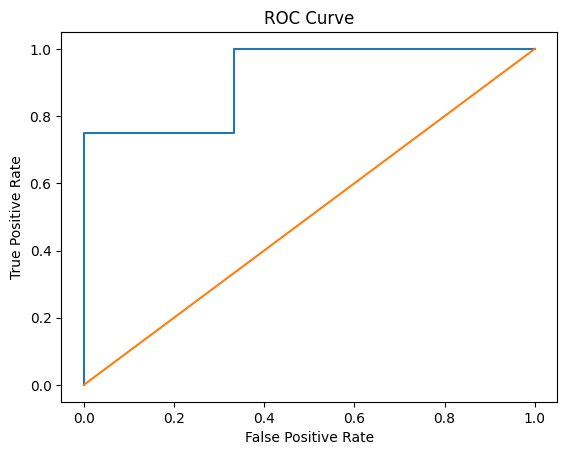

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# True labels
y_true = np.array([1,1,1,1,0,0,0,0,0,0])

# Predicted probabilities
y_prob = np.array([0.95,0.85,0.70,0.40,0.60,0.45,0.30,0.20,0.10,0.05])

# ROC values
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
auc = roc_auc_score(y_true, y_prob)

print("AUC:", auc)

# Plot ROC
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


BASELINE RESULTS
Accuracy: 0.9825
ROC-AUC : 0.9954
Confusion matrix:
 [[41  1]
 [ 1 71]]

Classification report:
               precision    recall  f1-score   support

malignant(0)      0.976     0.976     0.976        42
   benign(1)      0.986     0.986     0.986        72

    accuracy                          0.982       114
   macro avg      0.981     0.981     0.981       114
weighted avg      0.982     0.982     0.982       114



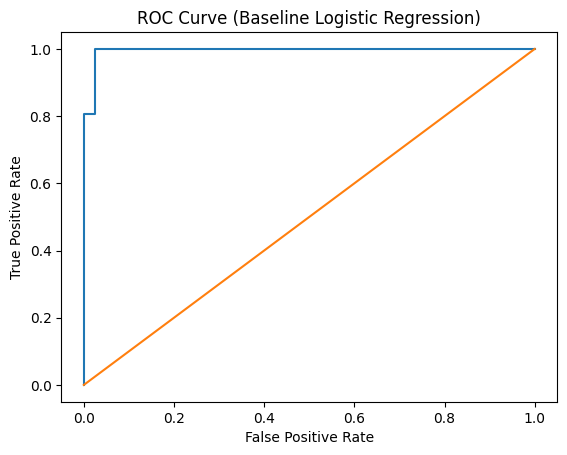

In [26]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report,
)

RANDOM_STATE = 42

# 1) Load a built-in binary classification dataset
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = malignant, 1 = benign (positive class here)

# 2) Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# 3) Pipeline: scaling + logistic regression
model = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=3000, random_state=RANDOM_STATE)),
    ]
)

# 4) Train
model.fit(X_train, y_train)

# 5) Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 6) Metrics
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["malignant(0)", "benign(1)"], digits=3)

print("BASELINE RESULTS")
print(f"Accuracy: {acc:.4f}")
print(f"ROC-AUC : {auc:.4f}")
print("Confusion matrix:\n", cm)
print("\nClassification report:\n", report)

# 7) ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Baseline Logistic Regression)")
plt.show()


In [27]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    "clf__solver": ["liblinear"],      # simple, robust solver
    "clf__penalty": ["l2"],            # L2 regularization
    "clf__C": [0.1, 1, 10],            # regularization strength
    "clf__class_weight": [None, "balanced"],  # handle imbalance
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="roc_auc",   # optimize for ranking quality
    cv=cv,
    n_jobs=1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

# Evaluate tuned model
y_pred_t = best_model.predict(X_test)
y_prob_t = best_model.predict_proba(X_test)[:, 1]

acc_t = accuracy_score(y_test, y_pred_t)
auc_t = roc_auc_score(y_test, y_prob_t)
cm_t = confusion_matrix(y_test, y_pred_t)

print("TUNED RESULTS (GridSearchCV)")
print("Best params:", grid.best_params_)
print(f"Best CV ROC-AUC: {grid.best_score_:.4f}")
print(f"Test Accuracy: {acc_t:.4f}")
print(f"Test ROC-AUC : {auc_t:.4f}")
print("Confusion matrix:\n", cm_t)


TUNED RESULTS (GridSearchCV)
Best params: {'clf__C': 1, 'clf__class_weight': None, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best CV ROC-AUC: 0.9954
Test Accuracy: 0.9825
Test ROC-AUC : 0.9957
Confusion matrix:
 [[41  1]
 [ 1 71]]


In [28]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

RANDOM_STATE = 42

# Dataset: Iris (3 classes)
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=RANDOM_STATE
)

# OvR (One-vs-Rest)
ovr_model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        multi_class="ovr",
        solver="liblinear",
        C=1.0,
        max_iter=2000,
        random_state=RANDOM_STATE
    ))
])

# Multinomial (Softmax)
multi_model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        multi_class="multinomial",
        solver="lbfgs",
        C=1.0,
        max_iter=2000,
        random_state=RANDOM_STATE
    ))
])

ovr_model.fit(X_train, y_train)
multi_model.fit(X_train, y_train)

# Predictions and probabilities
y_pred_ovr = ovr_model.predict(X_test)
p_ovr = ovr_model.predict_proba(X_test)

y_pred_multi = multi_model.predict(X_test)
p_multi = multi_model.predict_proba(X_test)

# Metrics
print("OvR Accuracy:", accuracy_score(y_test, y_pred_ovr))
print("OvR LogLoss :", log_loss(y_test, p_ovr))
print("OvR Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ovr))
print("\nOvR Report:\n", classification_report(y_test, y_pred_ovr, target_names=class_names, digits=3))

print("\n" + "="*60 + "\n")

print("Softmax Accuracy:", accuracy_score(y_test, y_pred_multi))
print("Softmax LogLoss :", log_loss(y_test, p_multi))
print("Softmax Confusion Matrix:\n", confusion_matrix(y_test, y_pred_multi))
print("\nSoftmax Report:\n", classification_report(y_test, y_pred_multi, target_names=class_names, digits=3))


OvR Accuracy: 0.7631578947368421
OvR LogLoss : 0.4592366669613188
OvR Confusion Matrix:
 [[11  1  0]
 [ 0  7  6]
 [ 0  2 11]]

OvR Report:
               precision    recall  f1-score   support

      setosa      1.000     0.917     0.957        12
  versicolor      0.700     0.538     0.609        13
   virginica      0.647     0.846     0.733        13

    accuracy                          0.763        38
   macro avg      0.782     0.767     0.766        38
weighted avg      0.777     0.763     0.761        38



Softmax Accuracy: 0.9210526315789473
Softmax LogLoss : 0.20896788754144638
Softmax Confusion Matrix:
 [[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]

Softmax Report:
               precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        12
  versicolor      0.857     0.923     0.889        13
   virginica      0.917     0.846     0.880        13

    accuracy                          0.921        38
   macro avg      0.925     0.923     0.923     

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
